## Author: Hamna Khan
## Date: December 4, 2022
## Purpose: This program is building Neural Network to predict house prices with Keras.

## Exploring and Processing the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [6]:
X = dataset[:,0:10]

In [7]:
Y = dataset[:,10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [13]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


## Building and Training Our First Neural Network

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [17]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 14ms/step - loss: 0.6763 - accuracy: 0.7162 - val_loss: 0.6641 - val_accuracy: 0.7900
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6685 - accuracy: 0.7290 - val_loss: 0.6557 - val_accuracy: 0.7580
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6615 - accuracy: 0.7319 - val_loss: 0.6482 - val_accuracy: 0.7626
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6546 - accuracy: 0.7387 - val_loss: 0.6410 - val_accuracy: 0.7671
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6481 - accuracy: 0.7417 - val_loss: 0.6342 - val_accuracy: 0.7763
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6419 - accuracy: 0.7544 - val_loss: 0.6276 - val_accuracy: 0.7854
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6357 - accuracy: 0.7485 - val_loss: 0.6216 - val_accuracy: 0.7900
Epoch 8/100


Epoch 59/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3252 - accuracy: 0.8728 - val_loss: 0.3371 - val_accuracy: 0.8584
Epoch 60/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3231 - accuracy: 0.8777 - val_loss: 0.3373 - val_accuracy: 0.8402
Epoch 61/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3218 - accuracy: 0.8757 - val_loss: 0.3352 - val_accuracy: 0.8584
Epoch 62/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3196 - accuracy: 0.8757 - val_loss: 0.3341 - val_accuracy: 0.8584
Epoch 63/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3176 - accuracy: 0.8806 - val_loss: 0.3328 - val_accuracy: 0.8584
Epoch 64/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3158 - accuracy: 0.8836 - val_loss: 0.3321 - val_accuracy: 0.8584
Epoch 65/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3151 - accuracy: 0.8816 - val_loss: 0.3311 - val_accuracy: 0.8539
Epoch 

In [19]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.2672 - accuracy: 0.8904


0.8904109597206116

## Visualizing Loss and Accuracy

In [20]:
import matplotlib.pyplot as plt

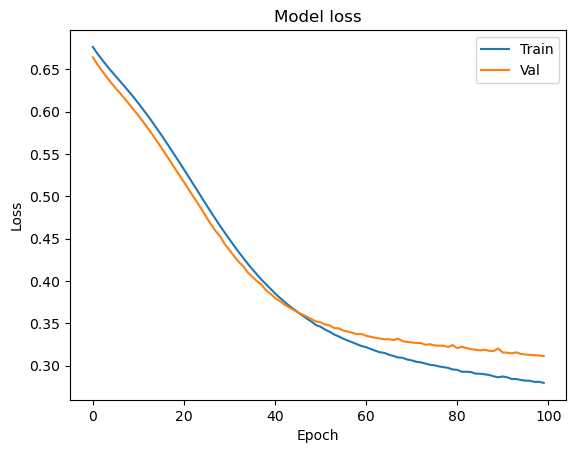

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

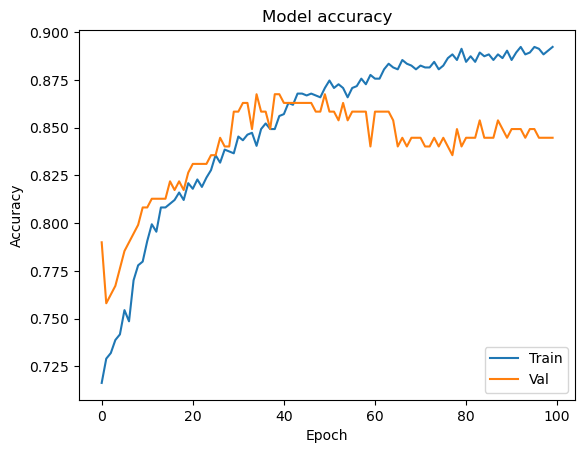

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Adding Regularization to our Neural Network

In [23]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 31ms/step - loss: 0.4902 - accuracy: 0.7789 - val_loss: 0.3761 - val_accuracy: 0.8402
Epoch 2/100
32/32 [==============================] - 1s 22ms/step - loss: 0.3514 - accuracy: 0.8591 - val_loss: 0.3653 - val_accuracy: 0.8219
Epoch 3/100
32/32 [==============================] - 1s 22ms/step - loss: 0.3147 - accuracy: 0.8650 - val_loss: 0.2891 - val_accuracy: 0.8539
Epoch 4/100
32/32 [==============================] - 1s 22ms/step - loss: 0.3071 - accuracy: 0.8748 - val_loss: 0.3022 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 1s 22ms/step - loss: 0.2813 - accuracy: 0.8914 - val_loss: 0.3528 - val_accuracy: 0.8311
Epoch 6/100
32/32 [==============================] - 1s 22ms/step - loss: 0.2925 - accuracy: 0.8787 - val_loss: 0.3080 - val_accuracy: 0.8447
Epoch 7/100
32/32 [==============================] - 1s 21ms/step - loss: 0.2648 - accuracy: 0.8914 - val_loss: 0.2850 - val_accuracy: 0.8447
Epoch 

32/32 [==============================] - 1s 23ms/step - loss: 0.1601 - accuracy: 0.9325 - val_loss: 0.3160 - val_accuracy: 0.8767
Epoch 59/100
32/32 [==============================] - 1s 24ms/step - loss: 0.1620 - accuracy: 0.9266 - val_loss: 0.4499 - val_accuracy: 0.8493
Epoch 60/100
32/32 [==============================] - 1s 24ms/step - loss: 0.1533 - accuracy: 0.9384 - val_loss: 0.3732 - val_accuracy: 0.8630
Epoch 61/100
32/32 [==============================] - 1s 24ms/step - loss: 0.1409 - accuracy: 0.9374 - val_loss: 0.4143 - val_accuracy: 0.8767
Epoch 62/100
32/32 [==============================] - 1s 23ms/step - loss: 0.1400 - accuracy: 0.9413 - val_loss: 0.3538 - val_accuracy: 0.8950
Epoch 63/100
32/32 [==============================] - 1s 23ms/step - loss: 0.1390 - accuracy: 0.9403 - val_loss: 0.4115 - val_accuracy: 0.8767
Epoch 64/100
32/32 [==============================] - 1s 23ms/step - loss: 0.1346 - accuracy: 0.9452 - val_loss: 0.5394 - val_accuracy: 0.8630
Epoch 65/100

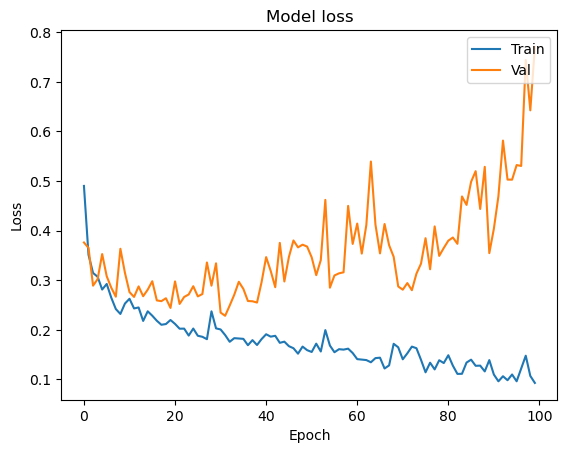

In [24]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

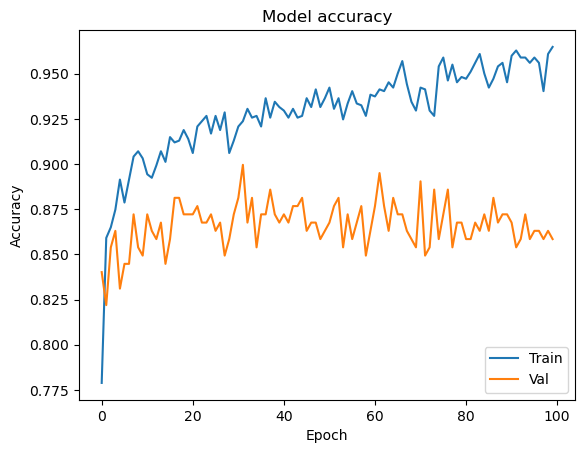

In [25]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [26]:
from keras.layers import Dropout
from keras import regularizers

In [27]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [28]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 50ms/step - loss: 14.2466 - accuracy: 0.6096 - val_loss: 3.8876 - val_accuracy: 0.8630
Epoch 2/100
32/32 [==============================] - 1s 37ms/step - loss: 1.6699 - accuracy: 0.8513 - val_loss: 0.7213 - val_accuracy: 0.8174
Epoch 3/100
32/32 [==============================] - 1s 37ms/step - loss: 0.5569 - accuracy: 0.8650 - val_loss: 0.5472 - val_accuracy: 0.8265
Epoch 4/100
32/32 [==============================] - 1s 36ms/step - loss: 0.5124 - accuracy: 0.8787 - val_loss: 0.5432 - val_accuracy: 0.8311
Epoch 5/100
32/32 [==============================] - 1s 37ms/step - loss: 0.5021 - accuracy: 0.8748 - val_loss: 0.5009 - val_accuracy: 0.8402
Epoch 6/100
32/32 [==============================] - 1s 37ms/step - loss: 0.4962 - accuracy: 0.8699 - val_loss: 0.4894 - val_accuracy: 0.8539
Epoch 7/100
32/32 [==============================] - 1s 37ms/step - loss: 0.4688 - accuracy: 0.8796 - val_loss: 0.4754 - val_accuracy: 0.8539
Epoch

32/32 [==============================] - 1s 36ms/step - loss: 0.4279 - accuracy: 0.8904 - val_loss: 0.4523 - val_accuracy: 0.8493
Epoch 59/100
32/32 [==============================] - 1s 35ms/step - loss: 0.4348 - accuracy: 0.8894 - val_loss: 0.4541 - val_accuracy: 0.8447
Epoch 60/100
32/32 [==============================] - 1s 37ms/step - loss: 0.4195 - accuracy: 0.8992 - val_loss: 0.4539 - val_accuracy: 0.8493
Epoch 61/100
32/32 [==============================] - 1s 40ms/step - loss: 0.4303 - accuracy: 0.8885 - val_loss: 0.4466 - val_accuracy: 0.8539
Epoch 62/100
32/32 [==============================] - 1s 39ms/step - loss: 0.4349 - accuracy: 0.8845 - val_loss: 0.4831 - val_accuracy: 0.8447
Epoch 63/100
32/32 [==============================] - 1s 38ms/step - loss: 0.4354 - accuracy: 0.8865 - val_loss: 0.4483 - val_accuracy: 0.8493
Epoch 64/100
32/32 [==============================] - 1s 38ms/step - loss: 0.4276 - accuracy: 0.8914 - val_loss: 0.4518 - val_accuracy: 0.8447
Epoch 65/100

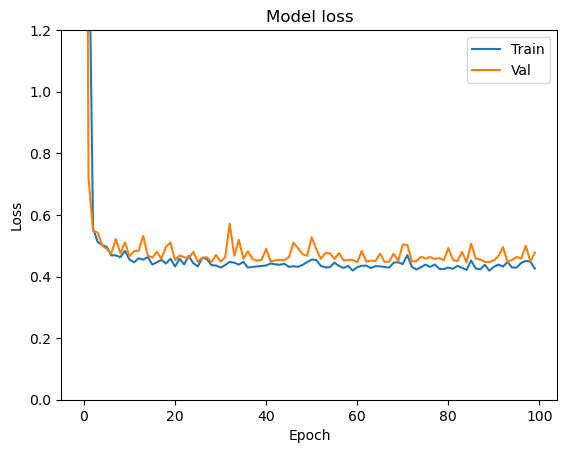

In [29]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

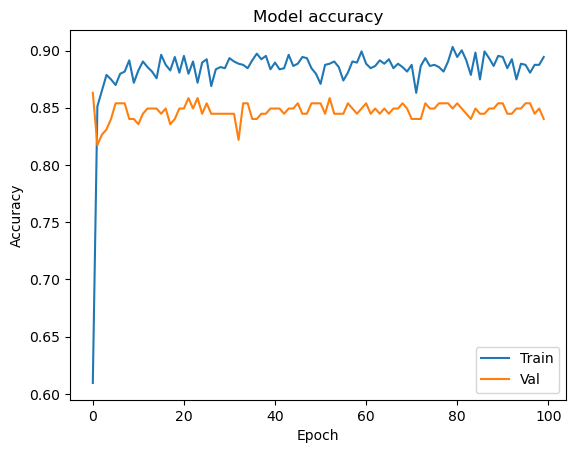

In [31]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()